### Application of K-Means Clustering on Customer Segmentation 

**Date: 08/07/21  
Name: Anoushka Rao  
PRN: 1901202007  
School: School of Data Science  
Program: B.Sc. Data Science  
Year/ Semester: Second Year Semester 4  
Subject Name: Machine Learning - II  
Subject Code: DS401**

**Title: Customer Segmentation using Clustering.**

**Skills/Competencies to be acquired:**
- Application of clustering
- Customer segmentation

**Duration of activity: 1 Hour**

**Purpose of this activity:**
The purpose of this activity is to apply a clustering algorithm after choose the optimal number of clusters for customer segmentation, which is an accurate representative of the dataset.

**Steps performed in this activity:**
1. Import the necessary modules.
2. Import the dataset in the python environment.
3. Create a pivot table containing dummy variables for the Offer variable.
4. Perform operations based on the given questions.
5. Find the optimal value of k using the elbow plot and silhouette score.
6. Perform kmeans clustering using the optimal value of k.
7. Note your conclusions.

**What resources / materials / equipment / tools did you use for this activity?**

Jupyter Notebook, Lecture Notes, Python and Machine Learning books, online resources from Google Classroom, dataset, Google Meet.

**What skills did you acquire?**

- Able to understand and implement kmeans clustering.
- Able to pick the optimal value of k using the elbow plot and silhouette score methods.

**Time taken to complete the activity: 1 Hour**

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [3]:
df1 = pd.read_excel('Datasets/Customer.xlsx', sheet_name=0)
df1.rename({'Offer #': 'Offer ID'}, axis=1, inplace=True)
df1.head()

,Offer ID,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


The first sheet of the dataset contains details about the various kinds of offers provided, as well as the attributes of the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. 

In [3]:
df2 = pd.read_excel('Datasets/Customer.xlsx', sheet_name=1)
df2.columns = ['Customer Name', 'Offer ID']
df2['n'] = 1
df2.head(10)

,Customer Name,Offer ID,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1
5,Williams,18,1
6,Williams,22,1
7,Williams,31,1
8,Brown,7,1
9,Brown,29,1


The second sheet of the dataset contains transactional data, i.e., the offer selected by each customer.

**Q.1] Create a data frame where each row has the following columns:  
a) customer_name  
b) One column for each offer, with a 1 if the customer responded to the offer.**

In [4]:
df = pd.merge(df2,df1, on='Offer ID')
#df.head()
table = pd.pivot_table(df, index = 'Customer Name', columns ='Offer ID', values='n')
table.reset_index(inplace=True)
table.fillna(0,inplace=True)
table.head()

Offer ID,Customer Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The new dataframe contains dummy variables for every offer ID (32 columns), which denote the offer selected by each customer. These variables will be used further in the clustering algorithm.

**Q.2] Create a numpy matrix `x_cols` with only the columns representing the offers (i.e.
the 0/1 columns)**

In [5]:
x_cols = np.matrix(table[table.columns[2:]])
x_cols

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.]])

**Q.3] What values of SS do you believe represent better clusterings? Why?**

In [6]:
from sklearn.cluster import KMeans

In [22]:
#Finding inertia for a range of K values
K = range(1,11)
ss = []
for k in K:
    #Building and fitting the model
    kmean = KMeans(n_clusters=k)
    kmean.fit(x_cols)
    ss.append(kmean.inertia_)
ss

[272.8999999999999,
 243.05934065934065,
 223.51666666666657,
 206.5575508464256,
 197.22121212121218,
 189.74388674388675,
 179.68708791208792,
 174.28333333333333,
 165.27027972027972,
 159.19605832763733]

To find out the optimal number of clusters, the within cluster sum of squares method is the most effective. It is used to compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. Lower sum of squares, or values of inertia, represent the no. of clusters better, as it means that each cluster is more tightly defined.

**Q.4] Construct a plot showing SS for each k and pick k using this plot.**

Text(0.5, 1.0, 'Elbow plot for optimal K')

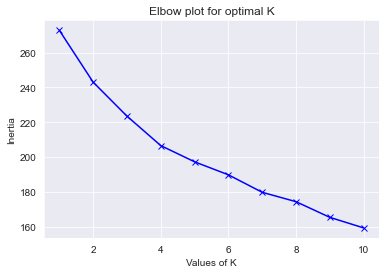

In [24]:
#Plotting inertia for various values of x

sns.set_style('darkgrid')
plt.plot(K, ss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow plot for optimal K')
#plt.axvline(x=7,ls="--",linewidth=1,c='k')

The elbow plot showing values of inertia for each value of k depicts a break in the slope(elbow) at the point where x (number of clusters) = 7. Therefore, the k-means model would be built on 7 clusters.

**Q.5] Write code that applies the clustering method from scikit-learn to this matrix.**

In [9]:
#Building the kmeans model using k = 7
model = KMeans(n_clusters=7)
pred = model.fit_predict(x_cols)
pred

array([0, 6, 1, 0, 6, 5, 1, 0, 3, 0, 3, 1, 0, 3, 3, 1, 4, 1, 0, 4, 0, 4,
       2, 3, 1, 6, 4, 4, 6, 4, 0, 4, 3, 2, 0, 0, 3, 0, 3, 0, 1, 1, 4, 6,
       0, 2, 0, 0, 6, 3, 4, 5, 4, 1, 5, 0, 1, 4, 0, 6, 6, 4, 6, 0, 0, 4,
       1, 4, 5, 6, 4, 6, 2, 0, 6, 0, 1, 2, 4, 4, 4, 4, 4, 1, 0, 0, 0, 4,
       6, 4, 2, 0, 4, 0, 3, 5, 0, 6, 2, 5])

**Q.6] Make a bar chart showing the number of points in each cluster for k-means under
the best k.**

In [10]:
#Adding a column to the table which denotes the cluster each customer belongs to
k = 7
table['cluster'] = KMeans(n_clusters = k).fit_predict(x_cols)
table

Offer ID,Customer Name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
96,Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
97,Wood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
98,Wright,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3


In [38]:
table.cluster.unique()

array([6, 2, 1, 5, 0, 3, 4])

In [39]:
table.cluster.value_counts()

2    20
6    18
0    18
5    14
3    13
1    12
4     5
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Number of points per cluster')

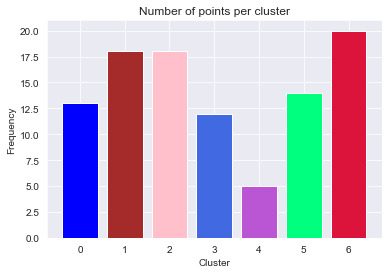

In [67]:
#Plotting a bar chart for the number of points in each cluster
colors = ['crimson', 'pink', 'brown', 'springgreen', 'blue', 'royalblue', 'mediumorchid']
plt.bar(table.cluster.unique(),table.cluster.value_counts(), color=colors)
#sns.countplot(x = table.cluster.unique(),data = table.cluster.value_counts())
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Number of points per cluster')

The bar chart shows that cluster 4 has the highest frequency of data points under it and cluster 5 has the lowest.

**Q.7] What challenges did you experience using the Elbow method to pick k?**

The challenge faced while using the elbow method to pick the optimal k value is that it is often based more on observational skills and less on the accurate science behind the method. Therefore, the values may vary according to each individual's observations and practices. For a more accurate no. of clusters, hierarchical clustering could be used to plot a dendrogram, which gives an accurate representation of the number of clusters.

**Q.8] Compute the average silhouette score for each K and plot it. What K does the
plot suggest we should choose? Does it differ from what we found using the Elbow
method?**

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [18]:
#Finding the silhouette score for a range of K values

silhouette = []
K = range(2, 11)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    pred = kmeanModel.fit_predict(x_cols)
    silhouette.append(silhouette_score(x_cols, pred))
silhouette

[0.08719548594501424,
 0.11976689328727136,
 0.1229332336547875,
 0.1427720199765479,
 0.13578140662067167,
 0.11987152536340279,
 0.12722667880694036,
 0.13187964373988703,
 0.13030199126106157]

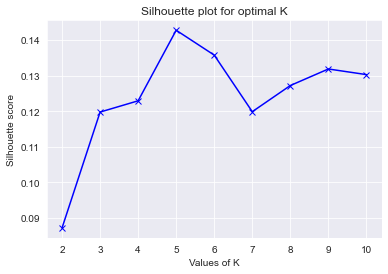

In [19]:
#Plotting silhouette score for various values of k

plt.plot(range(2, 11), silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette plot for optimal K')
plt.show()

According to the graph, the highest silhouette score is seen for k = 7, which means that it is the optimal number of clusters. This also aligns with the optimal k we found out using the elbow plot, thus validating our previous assumption.